In [245]:
import pandas as pd
import nltk

In [246]:
df = pd.read_csv('data/data_lettersfromgrandma.csv', index_col=False)
df

,letter_id,input_id,letter_date,year,transcribed,sender,sender_loc,sender_loc_raw,sender_latitude,sender_longitude,...,rec_longitude,envelope,partial,postcard,postage,words,message_full,message_salutation,message_body,message_closing
0,1,116,11/17/41,1941,1,Elizabeth Jones,unknown,unknown,NaN,NaN,...,-99.573468,1.0,0.0,0,NaN,306.0,"Dear Mom, Pop, ""etc"" (that means you too Franc...","Dear Mom, Pop, ""etc"" (that means you too Franc...",Miss O Ryan says I may come home Wednesday and...,"Love, Lizzie."
1,2,117,12/5/45,1945,1,Elizabeth Jones,"Riverside, CA","Riverside, CA",33.980601,-117.375494,...,-99.996246,1.0,0.0,0,0.08,2081.0,Dearest Mom and Daddy. Your letter came about ...,Dearest Mom and Daddy.,"Your letter came about an hour ago, Mom. The t...","All my love, Betty."
2,3,121,9/26/46,1946,1,Elizabeth Jones,"Riverside, CA","Riverside, CA",33.980601,-117.375494,...,-99.996246,1.0,0.0,0,0.09,796.0,"Dearest Mom, Pop, and Kidlets. Mom your super-...","Dearest Mom, Pop, and Kidlets.","Mom your super-duper letters came, so will ans...","Once again, I must scoot to bed, soooo once ag..."
3,4,120,10/6/46,1946,1,Elizabeth Jones,"Yoleta, TX","Yoleta, TX",29.653492,-95.663616,...,-99.996246,1.0,0.0,0,0.03,863.0,"Dearest Mom, Pop, and kidlets. My little man i...","Dearest Mom, Pop, and kidlets.","My little man is writing to his folks, so I'll...","Lots of love from us both, Betty and Mutt."
4,5,119,10/8/46,1946,1,Elizabeth Jones,"El Paso, TX","El Paso, TX",31.761878,-106.485022,...,-99.996246,1.0,0.0,0,0.06,627.0,Dearest Folks. We got your super-duper letter ...,Dearest Folks.,"We got your super-duper letter yesterday, Mom,...","Lots of love, Betty and Mutt."
5,6,118,10/21/46,1946,1,Elizabeth Jones,"El Paso, TX","El Paso, TX",31.761878,-106.485022,...,-99.996246,1.0,0.0,0,0.02,1837.0,"Dearest Mom, Pop, and Kidlets. I'm lying on my...","Dearest Mom, Pop, and Kidlets.","I'm lying on my tummy on the bed, so if you ca...","Love, Betty."
6,7,122,1/25/47,1947,1,Elizabeth Jones,"Sumter, SC","Sumter, SC",33.920435,-80.341469,...,-100.728194,1.0,0.0,0,0.05,1233.0,"Dear Fritzie. Mutt just brought your ""manuscri...",Dear Fritzie.,"Mutt just brought your ""manuscript"" home, and ...","Till next time, love from us both, Betty and M..."
7,8,123,9/6/47,1947,1,Elizabeth Jones,"Sumter, SC","Sumter, SC",33.920435,-80.341469,...,-99.996246,1.0,0.0,0,0.05,1214.0,"Dearest Mom, Pop, and family. I really hit the...","Dearest Mom, Pop, and family.",I really hit the jackpot yesterday!! Got a let...,"Till next time, all our love, Betty, Mutt, and..."
8,9,124,9/29/47,1947,1,Elizabeth Jones,"Sumter, SC","Fort Jackson, SC",33.920435,-80.341469,...,-99.996246,1.0,0.0,0,0.05,529.0,"Dear Grandma, Granddad, Auntie, and Uncles. We...","Dear Grandma, Granddad, Auntie, and Uncles.","Well, we dood it!!! Got the cutest little dark...","Love to all of you from the three of us, Butty..."
9,10,125,1/5/48,1948,1,Elizabeth Jones,"Shaw Field, SC","Shaw Field, SC",33.715516,-78.866577,...,-99.996246,1.0,0.0,0,0.05,953.0,Dearest Folks. This is going to be a joint let...,Dearest Folks.,This is going to be a joint letter because I'd...,"Love from your ""rebels"", the South Carolina Jo..."


In [247]:
# one df for all letters (df_all), another for just transcribed (df) where 'transcribed' == 0
df_all = df.copy()


df.dropna(subset=['message_full'], inplace=True)

In [248]:
df_all.shape # should have ~360 rows

(362, 23)

In [249]:
df = df.reset_index(drop=True)
df

,letter_id,input_id,letter_date,year,transcribed,sender,sender_loc,sender_loc_raw,sender_latitude,sender_longitude,...,rec_longitude,envelope,partial,postcard,postage,words,message_full,message_salutation,message_body,message_closing
0,1,116,11/17/41,1941,1,Elizabeth Jones,unknown,unknown,NaN,NaN,...,-99.573468,1.0,0.0,0,NaN,306.0,"Dear Mom, Pop, ""etc"" (that means you too Franc...","Dear Mom, Pop, ""etc"" (that means you too Franc...",Miss O Ryan says I may come home Wednesday and...,"Love, Lizzie."
1,2,117,12/5/45,1945,1,Elizabeth Jones,"Riverside, CA","Riverside, CA",33.980601,-117.375494,...,-99.996246,1.0,0.0,0,0.08,2081.0,Dearest Mom and Daddy. Your letter came about ...,Dearest Mom and Daddy.,"Your letter came about an hour ago, Mom. The t...","All my love, Betty."
2,3,121,9/26/46,1946,1,Elizabeth Jones,"Riverside, CA","Riverside, CA",33.980601,-117.375494,...,-99.996246,1.0,0.0,0,0.09,796.0,"Dearest Mom, Pop, and Kidlets. Mom your super-...","Dearest Mom, Pop, and Kidlets.","Mom your super-duper letters came, so will ans...","Once again, I must scoot to bed, soooo once ag..."
3,4,120,10/6/46,1946,1,Elizabeth Jones,"Yoleta, TX","Yoleta, TX",29.653492,-95.663616,...,-99.996246,1.0,0.0,0,0.03,863.0,"Dearest Mom, Pop, and kidlets. My little man i...","Dearest Mom, Pop, and kidlets.","My little man is writing to his folks, so I'll...","Lots of love from us both, Betty and Mutt."
4,5,119,10/8/46,1946,1,Elizabeth Jones,"El Paso, TX","El Paso, TX",31.761878,-106.485022,...,-99.996246,1.0,0.0,0,0.06,627.0,Dearest Folks. We got your super-duper letter ...,Dearest Folks.,"We got your super-duper letter yesterday, Mom,...","Lots of love, Betty and Mutt."
5,6,118,10/21/46,1946,1,Elizabeth Jones,"El Paso, TX","El Paso, TX",31.761878,-106.485022,...,-99.996246,1.0,0.0,0,0.02,1837.0,"Dearest Mom, Pop, and Kidlets. I'm lying on my...","Dearest Mom, Pop, and Kidlets.","I'm lying on my tummy on the bed, so if you ca...","Love, Betty."
6,7,122,1/25/47,1947,1,Elizabeth Jones,"Sumter, SC","Sumter, SC",33.920435,-80.341469,...,-100.728194,1.0,0.0,0,0.05,1233.0,"Dear Fritzie. Mutt just brought your ""manuscri...",Dear Fritzie.,"Mutt just brought your ""manuscript"" home, and ...","Till next time, love from us both, Betty and M..."
7,8,123,9/6/47,1947,1,Elizabeth Jones,"Sumter, SC","Sumter, SC",33.920435,-80.341469,...,-99.996246,1.0,0.0,0,0.05,1214.0,"Dearest Mom, Pop, and family. I really hit the...","Dearest Mom, Pop, and family.",I really hit the jackpot yesterday!! Got a let...,"Till next time, all our love, Betty, Mutt, and..."
8,9,124,9/29/47,1947,1,Elizabeth Jones,"Sumter, SC","Fort Jackson, SC",33.920435,-80.341469,...,-99.996246,1.0,0.0,0,0.05,529.0,"Dear Grandma, Granddad, Auntie, and Uncles. We...","Dear Grandma, Granddad, Auntie, and Uncles.","Well, we dood it!!! Got the cutest little dark...","Love to all of you from the three of us, Butty..."
9,10,125,1/5/48,1948,1,Elizabeth Jones,"Shaw Field, SC","Shaw Field, SC",33.715516,-78.866577,...,-99.996246,1.0,0.0,0,0.05,953.0,Dearest Folks. This is going to be a joint let...,Dearest Folks.,This is going to be a joint letter because I'd...,"Love from your ""rebels"", the South Carolina Jo..."


In [250]:
df.shape # should have 50 rows as of 5/31/18 for 50 transcribed letters

(50, 23)

In [251]:
df.message_body.str.lower().to_frame().head()

,message_body
0,miss o ryan says i may come home wednesday and...
1,"your letter came about an hour ago, mom. the t..."
2,"mom your super-duper letters came, so will ans..."
3,"my little man is writing to his folks, so i'll..."
4,"we got your super-duper letter yesterday, mom,..."


# Exploratory NLP

## Sentence Tokenization

In [252]:
from nltk.tokenize import sent_tokenize

text = df.message_body.astype(str).tolist()
sentences_list = [sent_tokenize(msg) for msg in text]
sentences_list

# original method: worked for single string, had to modify for list
# sentences = sent_tokenize(text_list)
# print(sentences)

[['Miss O Ryan says I may come home Wednesday and do not need to come back to work till Friday noon.',
  "Pretty good, don't you think so?",
  "Haven't seen Helen today, but Mrs Selland said that fam and Helen were in town ‘cuz she saw you.",
  "Haven't had any mail except a letter from the corporal and one from the sailor last week.",
  "Suppose Helen won't be through until 6.",
  'I think that maybe I can get through by then, too.',
  'Got all my test papers back now.',
  "I told you some of the marks before, I think, but in case you'd like to know them all here goes: 91 Anatomy (3 kids flunked (below 65) and only 2 others above 90), 98 Ethics, 98 Nursing Arts, 100 Medical Nursing.",
  'Thelma Selling had her appendix removed this morning.',
  'She is feeling pretty good.',
  'Course she has quite a bit of pain yet.',
  '"Mama Gene" came out of her operation fine.',
  "She has a lot of pain though, but that's expected.",
  "They're both grand patients.",
  'Mrs Joe Bakn is also okay.

## TextBlob Sentiment

In [253]:
from textblob import TextBlob

In [254]:
# test sentiment on diff letters
for msg in df.message_body.tolist():
    print(msg)
    print()
    print(TextBlob(msg).sentiment)
    print()
    print()

Miss O Ryan says I may come home Wednesday and do not need to come back to work till Friday noon. Pretty good, don't you think so? Haven't seen Helen today, but Mrs Selland said that fam and Helen were in town ‘cuz she saw you. Haven't had any mail except a letter from the corporal and one from the sailor last week. Suppose Helen won't be through until 6. I think that maybe I can get through by then, too. Got all my test papers back now. I told you some of the marks before, I think, but in case you'd like to know them all here goes: 91 Anatomy (3 kids flunked (below 65) and only 2 others above 90), 98 Ethics, 98 Nursing Arts, 100 Medical Nursing. Thelma Selling had her appendix removed this morning. She is feeling pretty good. Course she has quite a bit of pain yet. "Mama Gene" came out of her operation fine. She has a lot of pain though, but that's expected. They're both grand patients. Mrs Joe Bakn is also okay. Mrs Robert Peterson from Knox has a baby girl and she named it "Betty Lo


Your letter came Monday, Daddy. I had a feeling it was news about Helen and was almost afraid to open it. How is she doing now? I feel so sorry for her and Les and it really makes us appreciate our boys. Well, we'll be seeing you next week about Thursday or Friday. We're leaving here this Friday the 13th and going up to Lebec, then to San Luis Obispo to see Marie and on to Porterville and Stockton and then on home. Mutt is being sent to Florida after all. He had a choice of that or being put in a "pool" here. Well, all overseas shipments take a few men out of the pool so rather than take chances of going overseas, we decided to go to Florida. Our furniture is being shipped by van, and they'll be here to pick up everything Friday afternoon and we'll leave as soon as they get stuff loaded. We're shipping everything but Karen's potty chair this time. We got car beds for the boys and a bottle warmer that plugs into the cigarette lighter, so we're all set as far as they go. By the way, Mom

Sentiment(polarity=0.16857072210197205, subjectivity=0.5442905242905242)


Just took all the kids to vacation Bible school, so will take a few minutes to  tell you we are really not dead or haven't left the country. Mutt came home Tuesday 7th at 6:30 AM and left yesterday morning at 10. Sure hated to see him go again but we had a wonderful vacation while he was here. We went to Washington DC one morning and went through part of the Smithsonian Institute and the aquarium in the department of commerce. Saw Sheppard's capsule in the aerospace building and the Kitty Hawk of the Wright brothers, and the animals of every description in the main part of the Smithsonian. You could spend a couple days there and still not see all there is to see. Mutt and I went to DC alone early one morning and went to the Pentagon to look at his service records. Saw them all, and Silvernail's ER is still in there, but after seeing it, I can't see there was anything exactly derogatory in it, it just neglected t

In [255]:
sentmtlist = [TextBlob(msg).sentiment for msg in df.message_body.tolist()]

In [256]:
len(sentmtlist)

50

In [257]:
sentmtlist

[Sentiment(polarity=0.23641927083333333, subjectivity=0.5102083333333334),
 Sentiment(polarity=0.24265562286775033, subjectivity=0.5078614909740737),
 Sentiment(polarity=0.09647114706737335, subjectivity=0.3919649943310657),
 Sentiment(polarity=0.1905641310196395, subjectivity=0.4339682539682541),
 Sentiment(polarity=0.17201665521978024, subjectivity=0.4693959223646724),
 Sentiment(polarity=0.12517263215179875, subjectivity=0.475836385836386),
 Sentiment(polarity=0.20200136707544453, subjectivity=0.5058210938994071),
 Sentiment(polarity=0.19483392287649884, subjectivity=0.45640571083505876),
 Sentiment(polarity=0.11614266103728313, subjectivity=0.5615540789959395),
 Sentiment(polarity=0.25563768461930225, subjectivity=0.513883116883117),
 Sentiment(polarity=0.25494791666666666, subjectivity=0.4814484126984127),
 Sentiment(polarity=0.15459674873737372, subjectivity=0.5588383838383838),
 Sentiment(polarity=0.021672786125911118, subjectivity=0.39697802197802196),
 Sentiment(polarity=0.161

In [258]:
df_sentmt = pd.DataFrame(sentmtlist)
df_sentmt.head()

,polarity,subjectivity
0,0.236419,0.510208
1,0.242656,0.507861
2,0.096471,0.391965
3,0.190564,0.433968
4,0.172017,0.469396


In [259]:
df_sentmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
polarity        50 non-null float64
subjectivity    50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


In [260]:
df_sentmt.index = df.index # synchronize indices so they concatenate nicely, since order is same
df = pd.concat([df, df_sentmt], axis=1)

df

,letter_id,input_id,letter_date,year,transcribed,sender,sender_loc,sender_loc_raw,sender_latitude,sender_longitude,...,partial,postcard,postage,words,message_full,message_salutation,message_body,message_closing,polarity,subjectivity
0,1,116,11/17/41,1941,1,Elizabeth Jones,unknown,unknown,NaN,NaN,...,0.0,0,NaN,306.0,"Dear Mom, Pop, ""etc"" (that means you too Franc...","Dear Mom, Pop, ""etc"" (that means you too Franc...",Miss O Ryan says I may come home Wednesday and...,"Love, Lizzie.",0.236419,0.510208
1,2,117,12/5/45,1945,1,Elizabeth Jones,"Riverside, CA","Riverside, CA",33.980601,-117.375494,...,0.0,0,0.08,2081.0,Dearest Mom and Daddy. Your letter came about ...,Dearest Mom and Daddy.,"Your letter came about an hour ago, Mom. The t...","All my love, Betty.",0.242656,0.507861
2,3,121,9/26/46,1946,1,Elizabeth Jones,"Riverside, CA","Riverside, CA",33.980601,-117.375494,...,0.0,0,0.09,796.0,"Dearest Mom, Pop, and Kidlets. Mom your super-...","Dearest Mom, Pop, and Kidlets.","Mom your super-duper letters came, so will ans...","Once again, I must scoot to bed, soooo once ag...",0.096471,0.391965
3,4,120,10/6/46,1946,1,Elizabeth Jones,"Yoleta, TX","Yoleta, TX",29.653492,-95.663616,...,0.0,0,0.03,863.0,"Dearest Mom, Pop, and kidlets. My little man i...","Dearest Mom, Pop, and kidlets.","My little man is writing to his folks, so I'll...","Lots of love from us both, Betty and Mutt.",0.190564,0.433968
4,5,119,10/8/46,1946,1,Elizabeth Jones,"El Paso, TX","El Paso, TX",31.761878,-106.485022,...,0.0,0,0.06,627.0,Dearest Folks. We got your super-duper letter ...,Dearest Folks.,"We got your super-duper letter yesterday, Mom,...","Lots of love, Betty and Mutt.",0.172017,0.469396
5,6,118,10/21/46,1946,1,Elizabeth Jones,"El Paso, TX","El Paso, TX",31.761878,-106.485022,...,0.0,0,0.02,1837.0,"Dearest Mom, Pop, and Kidlets. I'm lying on my...","Dearest Mom, Pop, and Kidlets.","I'm lying on my tummy on the bed, so if you ca...","Love, Betty.",0.125173,0.475836
6,7,122,1/25/47,1947,1,Elizabeth Jones,"Sumter, SC","Sumter, SC",33.920435,-80.341469,...,0.0,0,0.05,1233.0,"Dear Fritzie. Mutt just brought your ""manuscri...",Dear Fritzie.,"Mutt just brought your ""manuscript"" home, and ...","Till next time, love from us both, Betty and M...",0.202001,0.505821
7,8,123,9/6/47,1947,1,Elizabeth Jones,"Sumter, SC","Sumter, SC",33.920435,-80.341469,...,0.0,0,0.05,1214.0,"Dearest Mom, Pop, and family. I really hit the...","Dearest Mom, Pop, and family.",I really hit the jackpot yesterday!! Got a let...,"Till next time, all our love, Betty, Mutt, and...",0.194834,0.456406
8,9,124,9/29/47,1947,1,Elizabeth Jones,"Sumter, SC","Fort Jackson, SC",33.920435,-80.341469,...,0.0,0,0.05,529.0,"Dear Grandma, Granddad, Auntie, and Uncles. We...","Dear Grandma, Granddad, Auntie, and Uncles.","Well, we dood it!!! Got the cutest little dark...","Love to all of you from the three of us, Butty...",0.116143,0.561554
9,10,125,1/5/48,1948,1,Elizabeth Jones,"Shaw Field, SC","Shaw Field, SC",33.715516,-78.866577,...,0.0,0,0.05,953.0,Dearest Folks. This is going to be a joint let...,Dearest Folks.,This is going to be a joint letter because I'd...,"Love from your ""rebels"", the South Carolina Jo...",0.255638,0.513883


In [261]:
df.to_csv('data/data_lettersfromgrandma_indivletter.csv')

## Single Words

In [262]:
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords

In [263]:
# adapted from bigrams code below - may be better way to do this for single words
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"','’','”','“']
stop = set(stop)

counter = Counter()

messages = df.message_body.str.lower()

n = 1
for msg in messages:
    words = TextBlob(msg).words
    words = [w for w in words if w not in stop]
    word = ngrams(words, n)
    counter += Counter(word)

for phrase, count in counter.most_common(50):
    print('%20s %i' % (" ".join(phrase), count))

                  's 504
                 n't 475
                 get 237
                 got 211
                mutt 161
                time 147
                 one 141
                 'll 140
                home 134
                 see 131
                  'd 127
                  go 111
              little 111
                know 109
               going 109
                 day 105
                good 102
                like 102
                 're 101
                sure 96
                back 95
                  'm 90
                  us 89
               would 88
                 've 88
                said 87
                well 86
                went 82
                came 80
              really 79
               karen 76
                much 74
               could 72
               think 69
              letter 69
           yesterday 68
             morning 67
                come 66
                till 66
              pretty 66
               still 

## Bigrams

In [264]:
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"','’','”','“']
stop = set(stop)

counter = Counter()

messages = df.message_body.str.lower()

n = 2
for msg in messages:
    words = TextBlob(msg).words
    words = [w for w in words if w not in stop]
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)

for phrase, count in counter.most_common(50):
    print('%20s %i' % (" ".join(phrase), count))

              wo n't 45
              ca n't 38
            n't know 33
             've got 28
           would n't 27
             n't get 27
              gon na 24
          last night 23
        north dakota 22
           came home 19
              got ta 19
              oh yes 17
           could n't 16
            get home 16
           come home 15
           'd better 15
             's good 13
         living room 13
            n't love 12
            's going 12
           every day 12
             mutt 's 12
         grand forks 12
             'll get 11
          looks like 11
           mutt went 11
          better get 11
            karen 's 11
         pretty good 10
            think 's 10
            time get 10
            n't tell 9
            week ago 9
             n't see 9
             'm sure 9
       day yesterday 9
             etc etc 9
              's got 9
          every time 9
           're going 9
              see us 9
              's day 9
   

## Trigrams

In [265]:
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"','’','”','“']
stop = set(stop)

counter = Counter()

messages = df.message_body.str.lower()

n = 3
for msg in messages:
    words = TextBlob(msg).words
    words = [w for w in words if w not in stop]
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)

for phrase, count in counter.most_common(50):
    print('%20s %i' % (" ".join(phrase), count))

           'm gon na 8
          got ta get 8
     guess 'd better 6
       ca n't figure 5
         etc etc etc 5
         got ta quit 5
        n't know 'll 5
        n't get home 4
        'd better go 4
       'd better get 4
       going try get 4
         come see us 4
         wo n't long 4
       could n't get 4
        n't get back 4
         heh heh heh 4
         let us know 4
       mother 's day 4
     pretty good n't 3
       know n't love 3
       get home till 3
         'm sure n't 3
        oh yes helen 3
        've got lots 3
       's first time 3
      wish could see 3
       time get home 3
          gon na get 3
    reckon 'd better 3
    could see really 3
 living room kitchen 3
         've got get 3
         well got ta 3
        well 've got 3
           gon na go 3
         ca n't tell 3
         wo n't take 3
        'll see soon 3
      grandma fay 's 3
          ca n't see 3
       father 's day 3
          boy oh boy 3
 come home wednesday 2
           

## TF-IDF

Used this resource for tf-idf: https://sigdelta.com/blog/text-analysis-in-pandas/  

Used this resource to make df with row per sentence:  
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

In [266]:
# keep only letter id and body text (no salutation/closing)
df_sent = df[['letter_id','message_body']].copy()
df_sent.head()

,letter_id,message_body
0,1,Miss O Ryan says I may come home Wednesday and...
1,2,"Your letter came about an hour ago, Mom. The t..."
2,3,"Mom your super-duper letters came, so will ans..."
3,4,"My little man is writing to his folks, so I'll..."
4,5,"We got your super-duper letter yesterday, Mom,..."


In [267]:
# explode df by sentence

# SOURCE: https://stackoverflow.com/questions/12680754/
# split-explode-pandas-dataframe-string-entry-to-separate-rows

def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

def split_df(dataframe, col_name, sep):
    orig_col_index = dataframe.columns.tolist().index(col_name)
    orig_index_name = dataframe.index.name
    orig_columns = dataframe.columns
    dataframe = dataframe.reset_index()  # we need a natural 0-based index for proper merge
    index_col_name = (set(dataframe.columns) - set(orig_columns)).pop()
    df_split = pd.DataFrame(
        pd.DataFrame(dataframe[col_name].str.split(sep).tolist())
        .stack().reset_index(level=1, drop=1), columns=[col_name])
    df = dataframe.drop(col_name, axis=1)
    df = pd.merge(df, df_split, left_index=True, right_index=True, how='inner')
    df = df.set_index(index_col_name)
    df.index.name = orig_index_name
    # merge adds the column to the last place, so we need to move it back
    return change_column_order(df, col_name, orig_col_index)

df_sent = split_df(df_sent, 'message_body', '.')
df_sent.head(50)

,letter_id,message_body
0,1,Miss O Ryan says I may come home Wednesday and...
0,1,"Pretty good, don't you think so? Haven't seen..."
0,1,Haven't had any mail except a letter from the...
0,1,Suppose Helen won't be through until 6
0,1,"I think that maybe I can get through by then,..."
0,1,Got all my test papers back now
0,1,"I told you some of the marks before, I think,..."
0,1,Thelma Selling had her appendix removed this ...
0,1,She is feeling pretty good
0,1,Course she has quite a bit of pain yet


In [268]:
df_sent.shape

(1942, 2)

In [269]:
# Some used imports
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl

# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 12

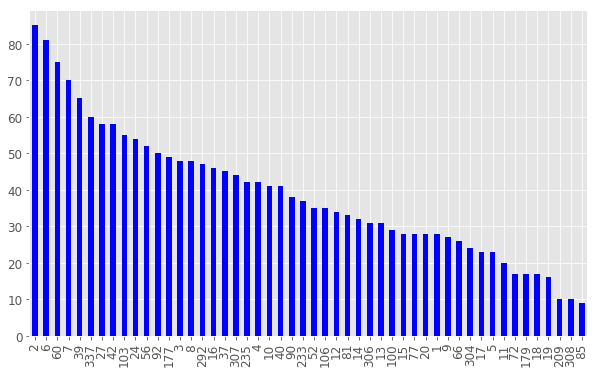

In [270]:
# bar chart of sentence lengths
df_sent['letter_id'].value_counts().plot.bar(color='blue')

In [271]:
df_sent['words'] = df_sent.message_body.str.strip().str.split('[\W]+')
df_sent.head()

,letter_id,message_body,words
0,1,Miss O Ryan says I may come home Wednesday and...,"[Miss, O, Ryan, says, I, may, come, home, Wedn..."
0,1,"Pretty good, don't you think so? Haven't seen...","[Pretty, good, don, t, you, think, so, Haven, ..."
0,1,Haven't had any mail except a letter from the...,"[Haven, t, had, any, mail, except, a, letter, ..."
0,1,Suppose Helen won't be through until 6,"[Suppose, Helen, won, t, be, through, until, 6]"
0,1,"I think that maybe I can get through by then,...","[I, think, that, maybe, I, can, get, through, ..."


In [272]:
rows = list()
for row in df_sent[['letter_id', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.letter_id, word))

words = pd.DataFrame(rows, columns=['letter_id', 'word'])
words.head(20)

,letter_id,word
0,1,Miss
1,1,O
2,1,Ryan
3,1,says
4,1,I
5,1,may
6,1,come
7,1,home
8,1,Wednesday
9,1,and


In [273]:
words.shape

(41068, 2)

In [274]:
# remove lines with length 0 (empty lines)
words = words[words.word.str.len() > 0]
words.head()

,letter_id,word
0,1,Miss
1,1,O
2,1,Ryan
3,1,says
4,1,I


In [275]:
words.shape # now fewer rows

(40916, 2)

In [276]:
# make words lowercase
words['word'] = words.word.str.lower()
words.head()

,letter_id,word
0,1,miss
1,1,o
2,1,ryan
3,1,says
4,1,i


In [277]:
# count of each word per book
counts = words.groupby('letter_id')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
letter_id word     
1         the    11
          and     8
          i       7
          of      7
          a       6

In [278]:
# top n words per letter
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
#     r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])

n_w
letter_id word     
1         the    11
          and     8
          i       7
          of      7
          a       6
2         i     152
          and    83
          that   68
          to     62
          t      55
3         and    34
          the    33
          i      27
          to     24
          a      16
4         and    38
          to     31
          i      28
          the    27
          it     18
5         and    38
          the    30
          i      19
          a      13
          to     13
6         and    99
          the    65
          i      61
          to     54
          a      32
...             ...
292       the    39
          and    36
          to     29
          he     24
          a      17
304       i      24
          and    22
          he     14
          to     13
          s      11
306       and    34
          the    30
          to     21
          i      20
          a      16
307       and    51
          a      27
          the    26
          to     24
          he     22
308       and     7
          the     6
          to      5
          we      4
          a       3
337       and    45
          the    30
          he     26
          to     24
          a      23

[250 rows x 1 columns]

In [279]:
# get counts for each letter
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
letter_id,
1,307
2,2176
3,805
4,895
5,650
6,1908
7,1272
8,1260
9,530


In [280]:
# join on letter id to get sum of word per letter
tf = counts.join(word_sum)
tf['tf'] = tf.n_w/tf.n_d
tf.head()

n_w  n_d        tf
letter_id word                    
1         the    11  307  0.035831
          and     8  307  0.026059
          i       7  307  0.022801
          of      7  307  0.022801
          a       6  307  0.019544

In [281]:
# mostly stop words so far
pretty_plot_top_n(tf['tf'])

tf
letter_id word          
1         the   0.035831
          and   0.026059
          i     0.022801
          of    0.022801
          a     0.019544
2         i     0.069853
          and   0.038143
          that  0.031250
          to    0.028493
          t     0.025276
3         and   0.042236
          the   0.040994
          i     0.033540
          to    0.029814
          a     0.019876
4         and   0.042458
          to    0.034637
          i     0.031285
          the   0.030168
          it    0.020112
5         and   0.058462
          the   0.046154
          i     0.029231
          a     0.020000
          to    0.020000
6         and   0.051887
          the   0.034067
          i     0.031971
          to    0.028302
          a     0.016771
...                  ...
292       the   0.042254
          and   0.039003
          to    0.031419
          he    0.026002
          a     0.018418
304       i     0.048880
          and   0.044807
          he    0.028513
          to    0.026477
          s     0.022403
306       and   0.047288
          the   0.041725
          to    0.029207
          i     0.027816
          a     0.022253
307       and   0.053968
          a     0.028571
          the   0.027513
          to    0.025397
          he    0.023280
308       and   0.045161
          the   0.038710
          to    0.032258
          we    0.025806
          a     0.019355
337       and   0.044687
          the   0.029791
          he    0.025819
          to    0.023833
          a     0.022840

[250 rows x 1 columns]

In [282]:
# get number of letters
c_d = words.letter_id.nunique()
c_d

50

In [283]:
# number of unique books every term appeared in
idf = words.groupby('word')\
    .letter_id\
    .nunique()\
    .to_frame()\
    .rename(columns={'letter_id':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
word,
zip,1
linda,1
underway,1
linker,1
lipstick,1


In [284]:
# calculate idf as new column
idf['idf'] = np.log(c_d/idf.i_d.values)
idf.head()

,i_d,idf
word,,
zip,1,3.912023
linda,1,3.912023
underway,1,3.912023
linker,1,3.912023
lipstick,1,3.912023


In [285]:
# get final dataframe by joining tf and idf
tf_idf = tf.join(idf)
tf_idf.head()

n_w  n_d        tf  i_d       idf
letter_id word                                   
1         the    11  307  0.035831   50  0.000000
          and     8  307  0.026059   49  0.020203
          i       7  307  0.022801   49  0.020203
          of      7  307  0.022801   50  0.000000
          a       6  307  0.019544   50  0.000000

In [286]:
# calculate tf-idf statistic
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w  n_d        tf  i_d       idf    tf_idf
letter_id word                                             
1         the    11  307  0.035831   50  0.000000  0.000000
          and     8  307  0.026059   49  0.020203  0.000526
          i       7  307  0.022801   49  0.020203  0.000461
          of      7  307  0.022801   50  0.000000  0.000000
          a       6  307  0.019544   50  0.000000  0.000000

In [287]:
pretty_plot_top_n(tf_idf['tf_idf'])

tf_idf
letter_id word                 
1         98           0.025485
          bailey       0.025485
          pain         0.025485
          stenson      0.025485
          nursing      0.020970
2         loved        0.016180
          engagement   0.010355
          him          0.008330
          usually      0.007396
          breaking     0.007191
3         ribbon       0.024464
          church       0.012550
          sugar        0.011996
          sib          0.010651
          campaign     0.009719
4         honey        0.009430
          major        0.008742
          miller       0.008742
          court        0.008466
          kocian       0.007193
5         cotton       0.034665
          raw          0.014856
          seeds        0.014856
          soooo        0.013048
          hayrack      0.012037
6         sooooo       0.012302
          mrs          0.006732
          johnson      0.005556
          october      0.005061
          el           0.004424
...                         ...
292       doug         0.009289
          aware        0.008477
          bucket       0.008477
          farther      0.008477
          mop          0.008477
304       dental       0.015935
          excited      0.014069
          graduation   0.013112
          listen       0.013112
          doug         0.010477
306       breakfast    0.011925
          alex         0.010882
          bacon        0.010882
          carton       0.010882
          disappeared  0.010882
307       fail         0.020699
          accordion    0.017863
          salesman     0.012419
          rich         0.011218
          pass         0.010691
308       award        0.050478
          cereal       0.050478
          roads        0.050478
          virginia     0.041534
          riverside    0.032590
337       punk         0.019179
          gloria       0.015983
          minot        0.015049
          picnic       0.009590
          doug         0.008514

[250 rows x 1 columns]

# Changing Pronouns

https://github.com/huggingface/neuralcoref  
https://spacy.io/usage/models

In [288]:
# ! pip install -U spacy

In [289]:
# run once
import spacy
import en_core_web_lg
from neuralcoref import Coref

spacy = en_core_web_lg.load()
coref = Coref(nlp=spacy)

Loading neuralcoref model from /Users/kellyjones/anaconda3/lib/python3.6/site-packages/neuralcoref/weights/
Loading embeddings from /Users/kellyjones/anaconda3/lib/python3.6/site-packages/neuralcoref/weights/static_word
Loading embeddings from /Users/kellyjones/anaconda3/lib/python3.6/site-packages/neuralcoref/weights/tuned_word


In [290]:
def replace_pronouns(text):
    coref.one_shot_coref(text)
    return coref.get_resolved_utterances()[0]

In [291]:
# dataframe for pronouns
df_pron = df[['letter_id','message_body']].copy()
df_pron.head()

,letter_id,message_body
0,1,Miss O Ryan says I may come home Wednesday and...
1,2,"Your letter came about an hour ago, Mom. The t..."
2,3,"Mom your super-duper letters came, so will ans..."
3,4,"My little man is writing to his folks, so I'll..."
4,5,"We got your super-duper letter yesterday, Mom,..."


In [292]:
python -m spacy download en_core_web_sm
>>> import spacy
>>> nlp = spacy.load('en_core_web_sm')

SyntaxError: invalid syntax (<ipython-input-292-13a26074a61b>, line 1)

In [ ]:
# df_pron['message_body_pronouns'] = df_pron['message_body'].apply(lambda x: replace_pronouns(x))
# df_pron.head()

In [ ]:
replace_pronouns('Sam went to the store. He is happy.')

# Modeling NLP Relationships

## Doc2Vec

**Not a good fit.** Data too small, even when I used more epochs, increased steps in `infer_vector()`, and dropped alpha for `infer_vector()` to be tiny.

Guided example from https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-lee.ipynb  
Wet blanket from https://stackoverflow.com/questions/49631758/gensim-doc2vec-most-similar-method-not-working-as-expected

In [293]:
import gensim
import os
import collections
import smart_open
import random

In [294]:
df.message_body

0     Miss O Ryan says I may come home Wednesday and...
1     Your letter came about an hour ago, Mom. The t...
2     Mom your super-duper letters came, so will ans...
3     My little man is writing to his folks, so I'll...
4     We got your super-duper letter yesterday, Mom,...
5     I'm lying on my tummy on the bed, so if you ca...
6     Mutt just brought your "manuscript" home, and ...
7     I really hit the jackpot yesterday!! Got a let...
8     Well, we dood it!!! Got the cutest little dark...
9     This is going to be a joint letter because I'd...
10    Tis gonna be a short note, but nevertheless we...
11    Well, here I am, late again!! Hope you had a h...
12    Gee, won't be long I can say that, will it, so...
13    Your letter about Uncle Bern got here day befo...
14    All is quiet on the Jones front, as yet!! Mutt...
15    Just finished my ironing so will take a few mi...
16    It's visiting hours and I don't got no company...
17    Mom came up to see me last night and broug

In [302]:
train_corpus = [gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(msg), [i]) for i, msg in enumerate(df.message_body.tolist())]
train_corpus[0]

TaggedDocument(words=['miss', 'ryan', 'says', 'may', 'come', 'home', 'wednesday', 'and', 'do', 'not', 'need', 'to', 'come', 'back', 'to', 'work', 'till', 'friday', 'noon', 'pretty', 'good', 'don', 'you', 'think', 'so', 'haven', 'seen', 'helen', 'today', 'but', 'mrs', 'selland', 'said', 'that', 'fam', 'and', 'helen', 'were', 'in', 'town', 'cuz', 'she', 'saw', 'you', 'haven', 'had', 'any', 'mail', 'except', 'letter', 'from', 'the', 'corporal', 'and', 'one', 'from', 'the', 'sailor', 'last', 'week', 'suppose', 'helen', 'won', 'be', 'through', 'until', 'think', 'that', 'maybe', 'can', 'get', 'through', 'by', 'then', 'too', 'got', 'all', 'my', 'test', 'papers', 'back', 'now', 'told', 'you', 'some', 'of', 'the', 'marks', 'before', 'think', 'but', 'in', 'case', 'you', 'like', 'to', 'know', 'them', 'all', 'here', 'goes', 'anatomy', 'kids', 'flunked', 'below', 'and', 'only', 'others', 'above', 'ethics', 'nursing', 'arts', 'medical', 'nursing', 'thelma', 'selling', 'had', 'her', 'appendix', 'remo

In [303]:
test_corpus = [gensim.utils.simple_preprocess(msg) for msg in df.message_body.tolist()]
print(test_corpus[0])

['miss', 'ryan', 'says', 'may', 'come', 'home', 'wednesday', 'and', 'do', 'not', 'need', 'to', 'come', 'back', 'to', 'work', 'till', 'friday', 'noon', 'pretty', 'good', 'don', 'you', 'think', 'so', 'haven', 'seen', 'helen', 'today', 'but', 'mrs', 'selland', 'said', 'that', 'fam', 'and', 'helen', 'were', 'in', 'town', 'cuz', 'she', 'saw', 'you', 'haven', 'had', 'any', 'mail', 'except', 'letter', 'from', 'the', 'corporal', 'and', 'one', 'from', 'the', 'sailor', 'last', 'week', 'suppose', 'helen', 'won', 'be', 'through', 'until', 'think', 'that', 'maybe', 'can', 'get', 'through', 'by', 'then', 'too', 'got', 'all', 'my', 'test', 'papers', 'back', 'now', 'told', 'you', 'some', 'of', 'the', 'marks', 'before', 'think', 'but', 'in', 'case', 'you', 'like', 'to', 'know', 'them', 'all', 'here', 'goes', 'anatomy', 'kids', 'flunked', 'below', 'and', 'only', 'others', 'above', 'ethics', 'nursing', 'arts', 'medical', 'nursing', 'thelma', 'selling', 'had', 'her', 'appendix', 'removed', 'this', 'mornin

In [387]:
# building model - play with parameters here
model = gensim.models.doc2vec.Doc2Vec(vector_size=10, epochs=500)

In [388]:
model.build_vocab(train_corpus)

In [389]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words, alpha=.00025, steps=500)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    second_ranks.append(sims[1])

In [390]:
collections.Counter(ranks)

Counter({0: 2,
         2: 1,
         7: 1,
         10: 1,
         11: 1,
         12: 1,
         14: 3,
         15: 1,
         16: 2,
         17: 1,
         18: 1,
         19: 2,
         22: 3,
         23: 2,
         25: 1,
         26: 1,
         27: 3,
         28: 3,
         29: 1,
         31: 1,
         33: 2,
         34: 2,
         36: 3,
         37: 2,
         38: 2,
         40: 1,
         41: 1,
         42: 1,
         43: 1,
         46: 1,
         47: 1,
         49: 1})

In [301]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Test Document (46): «looks like another nice day how it look from your window according to the tribune you need some rain up that way father and son just left they walk together in the morning mutt to work and doug to the bus stop mark and rich are still sleeping but they have weight lifting from to so ll let em sleep little longer before bacon egg them you should have been here yesterday mom mark and his two buddies had to go to the dispensary and get their food handlers physical mark got them both jobs as busboys with him at the officer club they had their chest rays tb skin tests etc and came home here each carrying paper sack with cardboard carton in it for stool specimen they hadn had breakfast yet so was in the kitchen frying bacon and heard mark yell hey guys got mine next thing knew alex disappeared he wasn gone long and pretty soon he came into the kitchen and said mrs jones do have to fill that carton kept straight face and said no alex you don have to fill it to the top then

## TF-IDF Vectorizer

### Methods Not Used

In [ ]:
# CLASS EX

# #### TF: term frequency in this document
# #### IDF: inverse document frequency (in the corpus)

# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer 
# from sklearn.naive_bayes import MultinomialNB

# vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
# doc_vectors = vectorizer.fit_transform(messages) # remember, this is our movie review dataset

# classes = np.array(['pos']*7 + ['neg']*7) # were 50 and 50 for 100 reviews


# model = MultinomialNB().fit(doc_vectors, classes) # fit this - multinomial Naive Bayes to document vecs
# # and whatever class I would like to predict (in this case, pos vs neg movie reviews)

In [422]:
# EX1 from https://stackoverflow.com/questions/8897593/similarity-between-two-text-documents

# unsure what to do with output

from sklearn.feature_extraction.text import TfidfVectorizer


documents = df.message_body.tolist()
tfidf_1 = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf_1 * tfidf_1.T
# print(pairwise_similarity)

In [ ]:
# list(tfidf_1)

### Method Used

In [561]:
# idea from https://stackoverflow.com/questions/8897593/similarity-between-two-text-documents
vect = TfidfVectorizer(min_df=3)
tfidf = vect.fit_transform(df.message_body.tolist())
cosinesims = (tfidf * tfidf.T).A
cosinesims

array([[1.        , 0.43883097, 0.43267532, ..., 0.42292669, 0.26892851,
        0.44072765],
       [0.43883097, 1.        , 0.61369838, ..., 0.6425881 , 0.38163982,
        0.60818044],
       [0.43267532, 0.61369838, 1.        , ..., 0.61388027, 0.40357013,
        0.59596814],
       ...,
       [0.42292669, 0.6425881 , 0.61388027, ..., 1.        , 0.46457823,
        0.69822379],
       [0.26892851, 0.38163982, 0.40357013, ..., 0.46457823, 1.        ,
        0.4531743 ],
       [0.44072765, 0.60818044, 0.59596814, ..., 0.69822379, 0.4531743 ,
        1.        ]])

In [562]:
cosinesims[5]

array([0.52000362, 0.71764021, 0.70538002, 0.7639161 , 0.74621631,
       1.        , 0.76205135, 0.7546778 , 0.64972571, 0.74051747,
       0.63082604, 0.68960768, 0.65203682, 0.74417045, 0.63061612,
       0.77976919, 0.63678503, 0.57549799, 0.57617087, 0.70503154,
       0.73874582, 0.70856043, 0.72655627, 0.67003887, 0.64515527,
       0.72058107, 0.68144835, 0.74539101, 0.71748391, 0.68864738,
       0.57013897, 0.68684322, 0.66495898, 0.25391501, 0.69205541,
       0.77243787, 0.57696496, 0.79425924, 0.72642318, 0.80680864,
       0.63318937, 0.61098158, 0.76327199, 0.79628134, 0.71491987,
       0.63513631, 0.70126678, 0.73261807, 0.48877278, 0.69714324])

In [563]:
# top 3 values
list(np.sort(cosinesims[0])[::-1][1:4])

[0.5292568718191739, 0.5200036161037749, 0.5187927306806294]

In [564]:
# masterful coding courtesy of Deven Morris!
doclist=[]
midlist =[]
for a in range(len(cosinesims)):
    for k in range(len(cosinesims[a])):
        if a!=k:
            pewpew = (k,list(cosinesims[a])[k])
            midlist.append(pewpew)
        anothervar = sorted(midlist,key=lambda x:x[1],reverse=True)[:3]
    doclist.append((a,anothervar))

print(doclist)

[(0, [(37, 0.5292568718191739), (5, 0.5200036161037749), (25, 0.5187927306806294)]), (1, [(5, 0.7176402093283909), (6, 0.7176154348454207), (35, 0.7086625760031378)]), (2, [(5, 0.7176402093283909), (6, 0.7176154348454207), (35, 0.7086625760031378)]), (3, [(5, 0.763916101257001), (4, 0.7206084168005255), (5, 0.7176402093283909)]), (4, [(5, 0.763916101257001), (39, 0.7535131848379569), (5, 0.7462163092664105)]), (5, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)]), (6, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)]), (7, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)]), (8, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)]), (9, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)]), (10, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)]), (11, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413

In [565]:
for line in doclist:
    print(line)

(0, [(37, 0.5292568718191739), (5, 0.5200036161037749), (25, 0.5187927306806294)])
(1, [(5, 0.7176402093283909), (6, 0.7176154348454207), (35, 0.7086625760031378)])
(2, [(5, 0.7176402093283909), (6, 0.7176154348454207), (35, 0.7086625760031378)])
(3, [(5, 0.763916101257001), (4, 0.7206084168005255), (5, 0.7176402093283909)])
(4, [(5, 0.763916101257001), (39, 0.7535131848379569), (5, 0.7462163092664105)])
(5, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)])
(6, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)])
(7, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)])
(8, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)])
(9, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)])
(10, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)])
(11, [(39, 0.8068086400438529), (43, 0.7962813423224503), (37, 0.7942592413470746)])
(1

In [492]:
simslist[0]

array([1.        , 0.32093615, 0.29701481, 0.33228848, 0.3087138 ,
       0.38593155, 0.37374567, 0.34353478, 0.28855424, 0.35356297,
       0.27332897, 0.32243967, 0.31967975, 0.320794  , 0.26136408,
       0.34685869, 0.29380595, 0.22647455, 0.28405652, 0.32520009,
       0.31427639, 0.33385262, 0.35216117, 0.2851986 , 0.30344035,
       0.37361224, 0.30799486, 0.32481644, 0.3533954 , 0.32509994,
       0.23676996, 0.2828419 , 0.29364667, 0.10115939, 0.32527681,
       0.3646837 , 0.26038063, 0.37676328, 0.31838783, 0.36037016,
       0.2980961 , 0.26005942, 0.31590993, 0.33679402, 0.31393169,
       0.24966536, 0.29027215, 0.3013871 , 0.15858306, 0.30144381])

In [494]:
for array in simslist:
    array.sort()
    print(array)

[0.10115939 0.15858306 0.22647455 0.23676996 0.24966536 0.26005942
 0.26038063 0.26136408 0.27332897 0.2828419  0.28405652 0.2851986
 0.28855424 0.29027215 0.29364667 0.29380595 0.29701481 0.2980961
 0.3013871  0.30144381 0.30344035 0.30799486 0.3087138  0.31393169
 0.31427639 0.31590993 0.31838783 0.31967975 0.320794   0.32093615
 0.32243967 0.32481644 0.32509994 0.32520009 0.32527681 0.33228848
 0.33385262 0.33679402 0.34353478 0.34685869 0.35216117 0.3533954
 0.35356297 0.36037016 0.3646837  0.37361224 0.37374567 0.37676328
 0.38593155 1.        ]
[0.13170361 0.27438522 0.32093615 0.38945815 0.41849331 0.42159642
 0.43765157 0.4478585  0.47179564 0.47370522 0.47738685 0.4803453
 0.48234039 0.48632727 0.48875858 0.49055756 0.49484254 0.50535026
 0.50717238 0.51259402 0.51292977 0.51363905 0.51691806 0.52358426
 0.52514175 0.52530007 0.52760009 0.53602881 0.54177257 0.54486934
 0.54534767 0.54572609 0.54652074 0.55297198 0.55480697 0.5564575
 0.55913578 0.56532184 0.57350445 0.5806964

In [425]:
# PLAN
for array in cosinesims:
    np.sort(cosinesims)
    sort
    get 1:4
    return values 1:4
    look up index of values in original array
    return letter_id[index]

None


### Ex3

In [ ]:
# # ex3 from https://stackoverflow.com/questions/8897593/similarity-between-two-text-documents

# import spacy
# nlp = spacy.load('en')
# doc1 = nlp(u'Hello hi there!')
# doc2 = nlp(u'Hello hi there!')
# doc3 = nlp(u'Hey whatsup?')

# print doc1.similarity(doc2) # 0.999999954642
# print doc2.similarity(doc3) # 0.699032527716
# print doc1.similarity(doc3) # 0.699032527716

In [ ]:
# KELLY'S INTERP - DOES NOT WORK
# import spacy
# nlp = spacy.load('en')
# doc1 = nlp(u'Hello hi there!')
# doc2 = nlp(u'Hello hi there!')
# doc3 = nlp(u'Hey whatsup?')

# docs = df.message_body.tolist()

# len(docs)

# sims1 = []

# # for doc in docs:
# #     for i in range len(docs):
# #         doc.similarity(docs[i])
# #         sims1.append(doc,i)

# # sims1
        
# # print doc1.similarity(doc2) # 0.999999954642
# # print doc2.similarity(doc3) # 0.699032527716
# # print doc1.similarity(doc3) # 0.699032527716

### Ex4

In [411]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


print(cosine_sim('a little bird', 'a little bird'))
print(cosine_sim('a little bird', 'a little bird chirps'))
print(cosine_sim('a little bird', 'a big dog barks'))

0.9999999999999998
0.7092972666062738
0.0


## LDA

In [ ]:
# # Class Example
# # gensim
# from gensim import corpora, models, similarities, matutils
# # sklearn
# from sklearn import datasets
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.cluster import KMeans
# # logging for gensim (set to INFO)
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Testing Amy's Code

In [418]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [413]:
# Create a TfidfVectorizer for parsing/counting words
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words=ENGLISH_STOP_WORDS)

In [415]:
docs = df.message_body.tolist()
x = tfidf.fit_transform(docs)

In [416]:
feature_names = tfidf.get_feature_names()
len(feature_names)

2429

In [419]:
# Create a CountVectorizer for parsing/counting words
vect = CountVectorizer(ngram_range=(1,3), min_df=3, stop_words=ENGLISH_STOP_WORDS,strip_accents='unicode')

In [420]:
x = vect.fit_transform(docs)

In [421]:
feature_names = vect.get_feature_names()
len(feature_names)

1242